# Overview
### Introduction
This assignment is a programming assignment  to build a multiple linear regression model for the prediction of demand for shared bikes.
  

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Objectives
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


#### Importing Libraries

In [76]:
import numpy as np # for mathematical operations
import pandas as pd # for reading and manipulation of data
import matplotlib.pyplot as plt # plotting charts and graphs
%matplotlib inline
import seaborn as sns # graph library that uses matplot in background
import plotly.express as px
import warnings # ignore the warnings
warnings.filterwarnings("ignore")
from datetime import datetime

### <font color =blue> Data visualization and cleaning

In [168]:
#importing the dataset
df = pd.read_csv("C:/Users/vikih/Desktop/Docs_Sow/Upgrad AI and ML/Module 3_Machine learning_Simple Multiple linear/Assignment/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
#understanding the shape of the data set
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [279]:
# Checking for column-wise sum of null values
df.isnull().sum ()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [209]:
#Checking for row-wise sum of missing values
(df.isnull().mean(axis=1)/100).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [280]:
# Checking for rows wise duplicate values
df.duplicated().sum()

0

In [23]:
df.shape

(730, 16)

In [3]:
df_duplicate = df
df_duplicate.drop_duplicates(inplace=True)
df_duplicate.shape
# After performing drop_duplicates() on "df_duplicate", 
# it is seen the shape of the dataframe doesn't change and same as original dataframe "df". 

(730, 16)

#### Inputs on data set
1. No null values present in the data set
2. 4 variables are of type float, 1 is object and 10 are integers
3. No duplicate values are present in the data set

In [4]:
df['instant'].value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

### <font color =blue> Exploratory data analysis

In [5]:
# Checking the statistics distribution of the existing columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


### Dropping varaibles which do not contribute to our analysis: [instant, casual, registered, dteday] 
1. instant is only an  ID and does not add any value
2. casual and registered are not of concern since we are building model for 'cnt'
3. dteday date not required since we already have mnth, yr and season in separate columns

In [169]:
df_bike_data = df.drop(['instant','casual','registered','dteday'], axis=1)

In [79]:
df_bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [80]:
# Checking the statistics distribution of the modififed data frame
df_bike_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


#### Identifying outliers by box plot and describing the modified data frame
1. We do not see outliers in the categorical variables: dteday, season, yr, mnth, holiday, weekday, workindday, weathersit
2. Ploting the values for continuous variables:  temp, atemp, hum, windspeed, cnt

### <font color =blue> Influence of variables

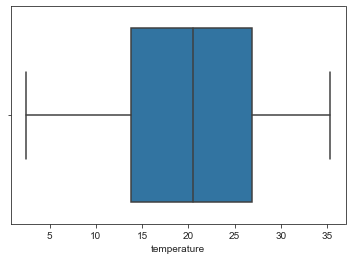

In [218]:
# plotting a boxplot for 'temp'
sns.boxplot(df_bike_data.temp)
plt.xlabel("temperature")
plt.show()

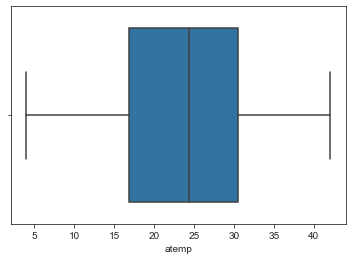

In [219]:
# plotting a boxplot for 'atemp'
sns.boxplot(df_bike_data.atemp)
plt.xlabel("atemp")
plt.show()

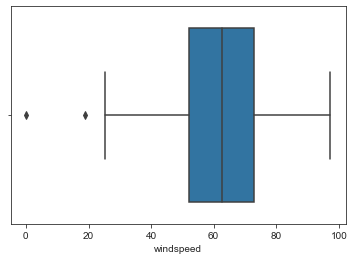

In [220]:
# plotting a boxplot for 'humidity'
sns.boxplot(df_bike_data.hum)
plt.xlabel("windspeed")
plt.show()

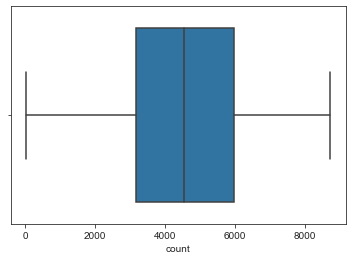

In [221]:
# plotting a boxplot for 'cnt'
sns.boxplot(df_bike_data.cnt)
plt.xlabel("count")
plt.show()

### The above plots look pretty much continuous, hence, we do not need to do any outlier removal here.
#### Inputs on EDA:

1. Extra characters : There are no extra characters that needs to be remove
2. Removing outliers: No treatment required since all are within the range 
3. Scaling of values: We will scale values with min max scaling in the model building

In [170]:
#finding correlation between variables
corr = df_bike_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.000000,0.831032,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-0.000000,1.000000,-0.000000,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,0.831032,-0.000000,1.000000,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-0.010868,0.008195,0.018905,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-0.003081,-0.005466,0.009523,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,0.013762,-0.002945,-0.004688,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,0.021306,-0.050322,0.045613,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,0.333361,0.048789,0.219083,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.342014,0.047215,0.226430,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.208220,-0.112547,0.224937,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


### Plotting the variables to understand the variation

1. Categorical variables: season, mnth, yr, holiday, weekday, workingday, weathresit
2. Continuous variables: temp, atemp, hum, windspeed

In [233]:
#defining a function to plotting bar graph for continuous variables
def plot_bar_graph(data, graph_title, x_axis_label, y_axis_label, x_label_rotation=0,x_text=None):
    fig, ax = plt.subplots(figsize=(13,7))
    graph_data = sns.barplot(x=data.index, y=data.values)
    graph_data_label = data.max()*0.01
    for index, value in enumerate(data.iteritems()):
        graph_data.text(index, value[1] + graph_data_label, round(value[1], 2), color='blue', ha="center", rotation='horizontal')       
    if x_text is None:
        graph_data.set_xticklabels(graph_data.get_xticklabels(), rotation=x_label_rotation)
    else:
        graph_data.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 25})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

In [234]:
from scipy.stats import pearsonr
month_dist = df_bike_data.groupby(by='mnth').cnt.mean()

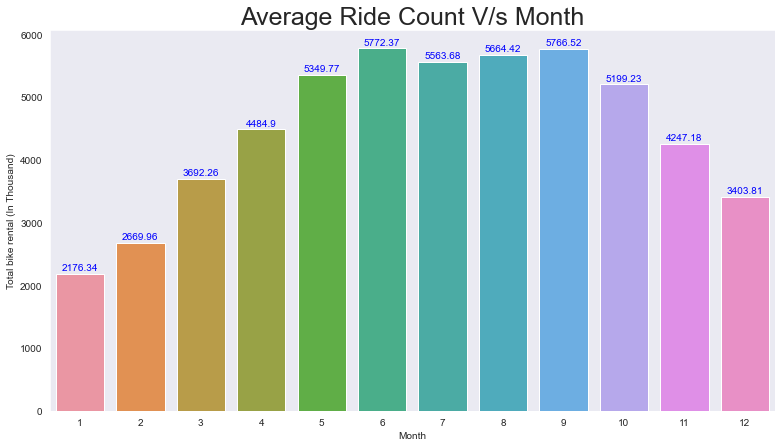

In [236]:
plot_bar_graph(data=month_dist, graph_title='Average Ride Count V/s Month', x_axis_label='Month',
                        y_axis_label='Total bike rental (In Thousand)', x_label_rotation=0)

In [237]:
#Grouping by season and plotting the same
month_season = df_bike_data.groupby(by='season').cnt.mean()

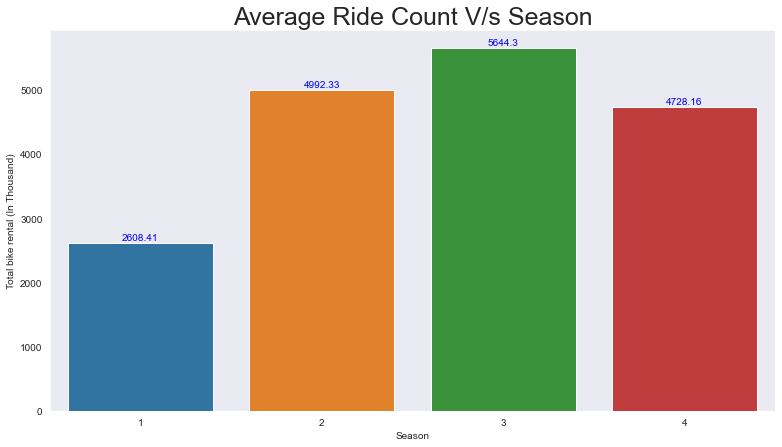

In [240]:
plot_bar_graph(data=month_season, graph_title='Average Ride Count V/s Season', x_axis_label='Season',
                        y_axis_label='Total bike rental (In Thousand)', x_label_rotation=0)

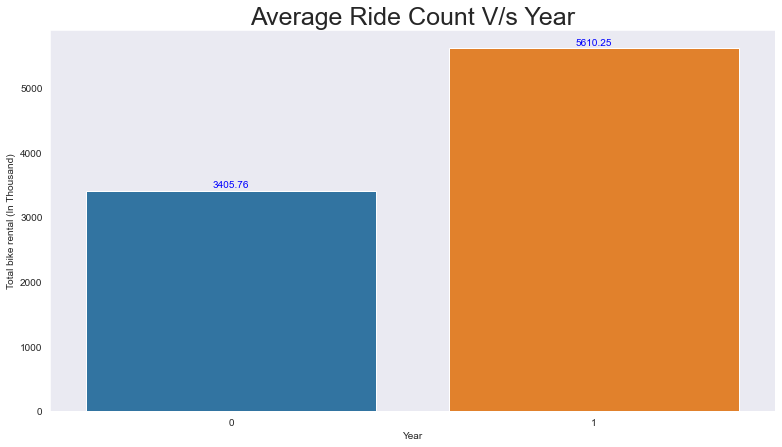

In [243]:
#Grouping by Year and plotting the same
year = df_bike_data.groupby(by='yr').cnt.mean()
plot_bar_graph(data=year, graph_title='Average Ride Count V/s Year', x_axis_label='Year',
                        y_axis_label='Total bike rental (In Thousand)', x_label_rotation=0)


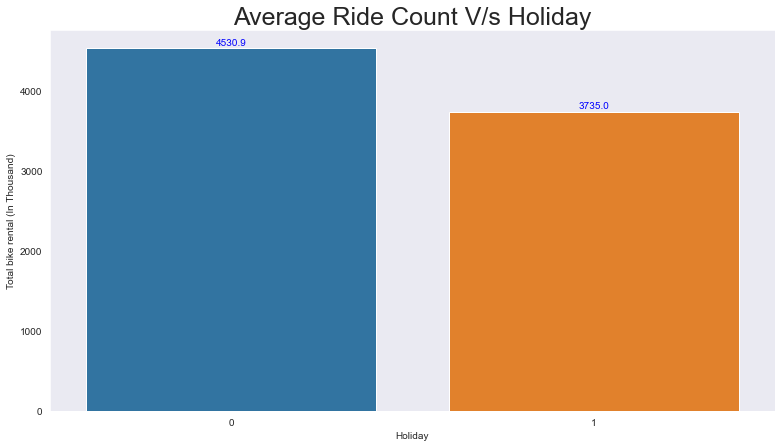

In [245]:
#Grouping by Holiday and plotting the same
Holiday = df_bike_data.groupby(by='holiday').cnt.mean()
plot_bar_graph(data=Holiday, graph_title='Average Ride Count V/s Holiday', x_axis_label='Holiday',
                        y_axis_label='Total bike rental (In Thousand)', x_label_rotation=0)


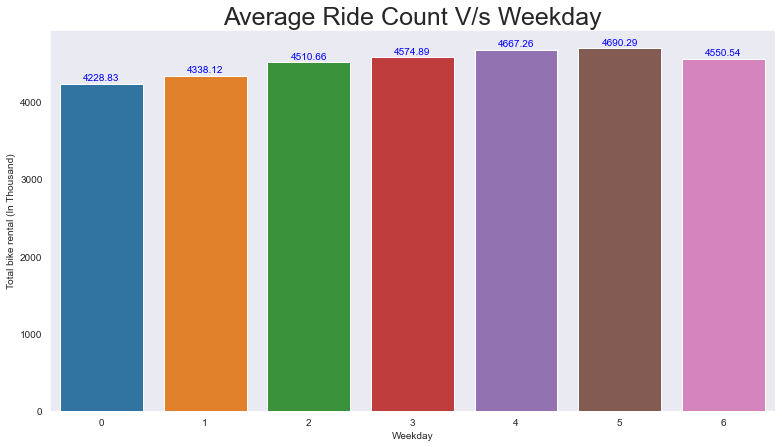

In [246]:
#Grouping by Weekday and plotting the same
Weekday = df_bike_data.groupby(by='weekday').cnt.mean()
plot_bar_graph(data=Weekday, graph_title='Average Ride Count V/s Weekday', x_axis_label='Weekday',
                        y_axis_label='Total bike rental (In Thousand)', x_label_rotation=0)


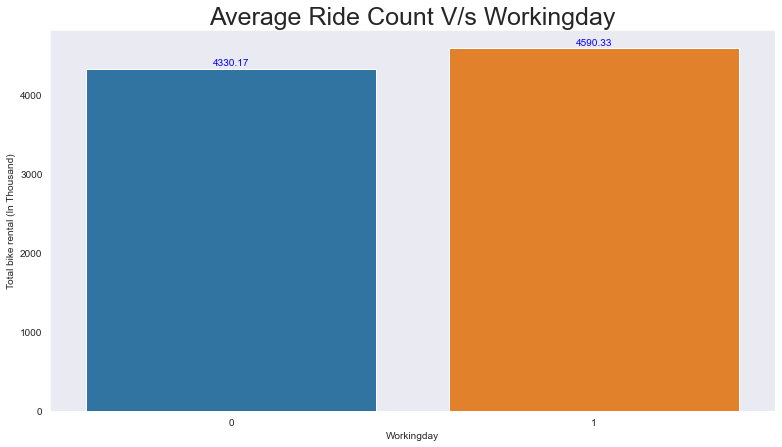

In [247]:
#Grouping by Workingday and plotting the same
Workingday = df_bike_data.groupby(by='workingday').cnt.mean()
plot_bar_graph(data=Workingday, graph_title='Average Ride Count V/s Workingday', x_axis_label='Workingday',
                        y_axis_label='Total bike rental (In Thousand)', x_label_rotation=0)


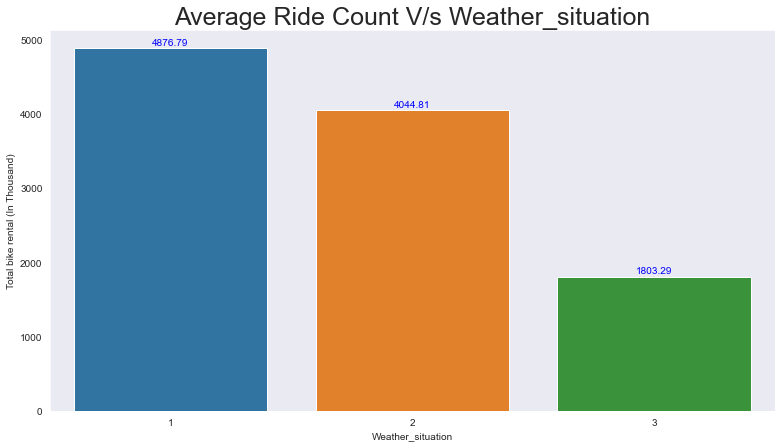

In [249]:
#Grouping by Weather_situation and plotting the same
Weather_situation = df_bike_data.groupby(by='weathersit').cnt.mean()
plot_bar_graph(data=Weather_situation, graph_title='Average Ride Count V/s Weather_situation', x_axis_label='Weather_situation',
                        y_axis_label='Total bike rental (In Thousand)', x_label_rotation=0)


### Numeric Variables
Plotting a pair plot


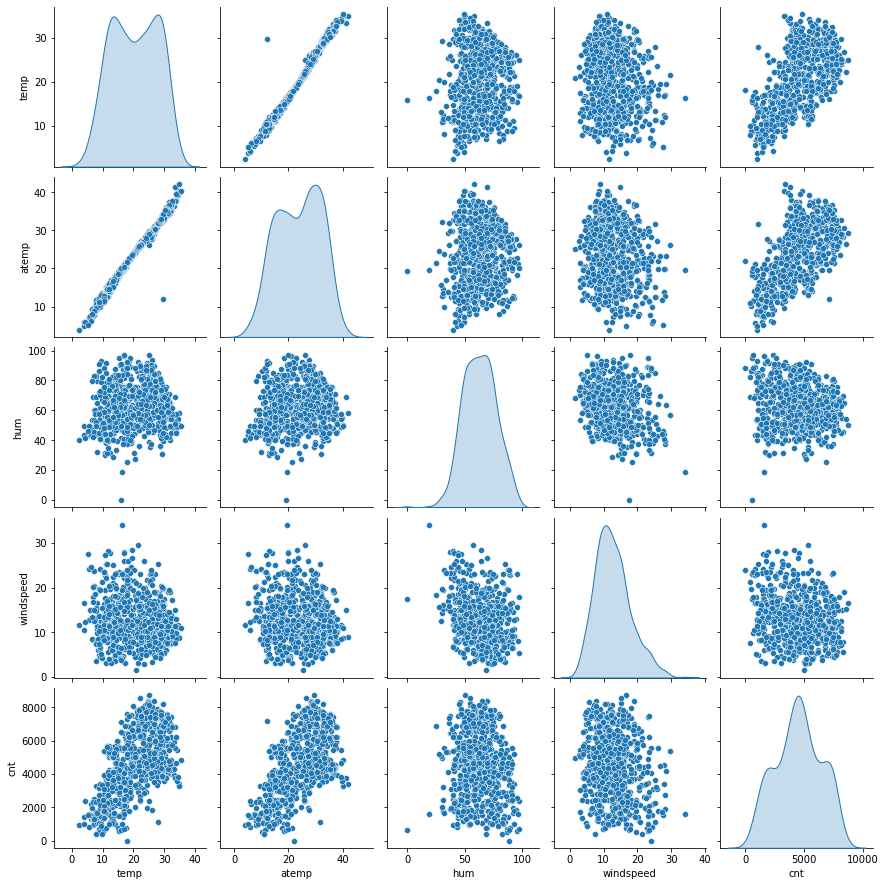

In [244]:
bike_numeric=df_bike_data[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_numeric, diag_kind='kde')
plt.show()

## <font color =blue> Inferences from the above analysis
### Categorical variables:
#### 1. Average Ride Count V/s Month:  Months 5, 6, 7, 8, 9 and 10 have a good bike rentals relative to others months which are May, June, July, Aug, Sep and October
#### 2. Average Ride Count V/s Season : Season 2, 3, 4 which is summer, fall and winter respectively has a positive impact on number of bikes rented, while in season 1 which is spring the number of bike rentals are less
#### 3. Average Ride Count V/s Year: Year 1 has a good increase in Total number of rental bikes as compared to Year 0, which is 2019 and 2018 respectively.
#### 4. Average Ride Count V/s Holiday: Bike rentals are not good when holiday=1, thus on a holiday the bike rentals really drop
#### 5. Average Ride Count V/s Weekday: Bike rentals drop when Weekday = 0 and pick up steady over the other days until Weekday =5, again on Weekday=6 it starts to drop
#### 6. Average Ride Count V/s Workingday: Bike rentals increase when Workingday = 1 and drop when Workingday = 0 which means people avail bike rentals more on a working day.  This also matches with "Average Ride Count V/s Holiday" results

#### 7. Average Ride Count V/s Weather_situation: Weather situation as 1 (which is Clear day) has highest bike rentals followed by 2 (Which is Misty, coludy day). Weather situation as 3  (light snow, light rain etc.,) has least registrations while weather situation 4 has no registrations at all 

### Continuous variables:
#### Linear relationship: We see a liner relationship between "Cnt" which is Total bike rentals v/s atemp, temp

## <font color =blue> Linear regression model

Buling regression model between "cnt" and other variables which have linear relationship with "cnt"

y = c + m1 * TV
y = c + m1x1 + m2x2 +...+ mnxn

Steps for model builing:

- Create X and Y
- Create train and test tests(70-30, 80-20) 70% training set, 30 trainign set etc,.
- Train the model on trainign set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)

In [245]:
#Creating Dummy Variables to proceed with modelling
#DUMMY variables to be created for 4 categorical variables 'mnth', 'weekday', 'season' , 'weathersit'.
#Convert to 'category' data type and then create the dummy

df_bike_data['season']=df_bike_data['season'].astype('category')
df_bike_data['weathersit']=df_bike_data['weathersit'].astype('category')
df_bike_data['mnth']=df_bike_data['mnth'].astype('category')
df_bike_data['weekday']=df_bike_data['weekday'].astype('category')
df_bike_data.info()

KeyError: 'season'

In [176]:
df_bike_data = pd.df_bike_data = pd.get_dummies(df_bike_data, drop_first=True)

df_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

#### As seen above we now have converted required variables into dummies

In [177]:
#finding correlation between variables
corr = df_bike_data.corr()
corr.style.background_gradient(cmap='coolwarm')

# We will refer to this correlation during the modelling process, there is lot of multi-collinearity between the variables

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.003904,-0.000000,-0.003935,-0.000000,-0.000000,-0.003904,-0.005796,-0.073758
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,-0.024408,-0.026393,0.016785,0.011980,-0.052432,0.008175,0.006363,-0.051502,0.006363,-0.052432,0.008175,0.006363,0.067852,0.006363,0.279764,-0.046701,-0.046213,-0.023254,-0.023254,-0.070541,-0.018668,-0.029619
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,0.015091,0.016775,-0.004623,-0.003093,0.027672,-0.010871,0.006542,0.021301,-0.014589,0.038238,-0.010871,-0.004024,-0.010871,-0.014589,0.152976,0.268896,0.267305,0.260469,0.260469,-0.602419,0.048877,0.028990
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,0.154876,0.678283,-0.225590,-0.310626,-0.174923,-0.041859,0.165188,0.308314,0.432722,0.354648,0.197729,-0.017616,-0.206690,-0.285664,-0.004799,0.019360,0.023459,0.019492,-0.000005,-0.030363,-0.096297,-0.058461
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,0.163151,0.655757,-0.205634,-0.310845,-0.173135,-0.032049,0.170447,0.300768,0.429350,0.330939,0.192477,-0.004775,-0.196877,-0.277484,0.000091,0.022045,0.020842,0.020453,-0.008544,-0.031340,-0.092933,-0.064937
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,-0.002870,0.024134,0.163908,-0.130521,-0.083887,-0.083266,0.131273,-0.109048,-0.063757,0.021580,0.183118,0.141557,-0.005837,0.082200,0.028591,0.040616,0.046059,-0.052003,-0.039809,-0.023310,0.490628,0.267592
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,0.097421,-0.139886,-0.135612,0.096093,0.126575,0.169830,-0.029534,-0.019624,-0.096090,-0.069125,-0.094825,-0.060133,-0.025873,-0.054616,0.000999,0.006961,-0.014025,0.005792,-0.021633,0.032187,-0.037177,0.117332
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,0.145325,0.345908,0.064619,-0.273848,-0.128456,-0.003574,0.132553,0.195568,0.166236,0.182100,0.194664,0.108846,-0.040344,-0.173878,-0.035991,0.000560,0.014012,0.033551,0.038403,0.009012,-0.170686,-0.240602
season_2,-0.000000,-0.024408,0.015091,0.154876,0.163151,-0.002870,0.097421,0.145325,1.000000,-0.341894,-0.329650,-0.167331,0.072119,0.515496,0.524801,0.285757,-0.176856,-0.176856,-0.173720,-0.176856,-0.173720,-0.176856,0.004803,-0.001929,0.009410,-0.001929,-0.001929,-0.004187,0.040011,-0.043283
season_3,0.000000,-0.026393,0.016775,0.678283,0.655757,0.024134,-0.139886,0.345908,-0.341894,1.000000,-0.334441,-0.169763,-0.179427,-0.176245,-0.179427,0.051874,0.517283,0.517283,0.325616,-0.179427,-0.176245,-0.179427,-0.009294,0.001940,0.004265,0.010903,0.001940,-0.000367,-0.101756,-0.026393


In [262]:
### Re-scaling some of the features
#We will be using MinMaxScaler approack using sklearn.preprocessing import MinMaxScaler


### Generic Steps in model building using `statsmodels`

In [206]:
#Model building and Resudial analysis
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
#r2_score(y_test, y_pred)

np.random.seed(0)
df_train, df_test = train_test_split(df_bike_data, train_size = 0.70, random_state = 100)

In [72]:
df_train.shape

(510, 12)

In [86]:
df_test.shape

(220, 12)

In [110]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [221]:
#scaling the numeric variables for the training set
# import the scaler from sklearn library
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
numeric_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


### Inferences:
##### Numeric features/variables ['temp', 'atemp', 'hum', 'windspeed','cnt'] got rescaled from original values to 0 and 1's.

### <font color =blue> Iterative Modeling Process

In [180]:
#importing the libraries and packages
import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
# importing librabries for VIF and RFE model building
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [181]:
# splitting the training set between dependent and independent variables
y_train = df_train.pop('cnt')
X_train = df_train

In [114]:
X_train.shape

(510, 29)

In [115]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.247059,0.262745,0.247059,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.431725,0.440557,0.431725,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
y_train.shape

(510,)

#### As seen we now have a X_train which has 29 variables and doing the model manually will be tedious in nature as we need to drop and pick variables
#### Hence will take RFE (Recursive Feature Elimination) approach to detemine the significant variables 
#### Once this is done, we will put in manual analysis to determine the best model.


In [117]:
# Passing an arbitrary number 15 to the RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
LinearRegression()
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [118]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
26,weekday_6,True,1
18,mnth_10,True,1
17,mnth_9,True,1
16,mnth_8,True,1
27,weathersit_2,True,1
9,season_4,True,1
8,season_3,True,1
28,weathersit_3,True,1
6,windspeed,True,1


In [119]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True])

In [298]:
#### As seen above RFE model has identified 15 predictors which will impact our outcome. 
### We will validate this manually in our model building process iteratively below

### Model - 1 

In [120]:
col_RFE = X_train.columns[rfe.support_]

In [121]:
col_RFE

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [122]:
X_train_rfe = X_train[col_RFE]

In [123]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train_rfe)

# Fit the resgression line using 'OLS'
Lr_Model1 = sm.OLS(y_train, X_train_sm).fit()

In [125]:
Lr_Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.17e-191
Time:                        21:09:15   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790      0.000       0.139       0.252
yr               0.2301      0.008     28.743      0.000       0.214       0.246
holiday         -0.0545      0.027     -2.025      0.043      -0.107      -0.002
workingday       0.0445      0.012      3.856      0.000       0.022       0.067
temp             0.4972      0.034     14.821      0.000       0.431       0.563
hum             -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed       -0.1825      0.025     -7.196      0.000      -0.232      -0.133
season_2         0.1183      0.015      8.038      0.000       0.089       0.147
season_3         0.0292      0.022      1.329      0.184      -0.014       0.072
season_4         0.1430      0.013     10.671      0.000       0.117       0.169
mnth_8           0.0473      0.017      2.732      0.007       0.013       0.081
mnth_9           0.1176      0.017      6.876      0.000       0.084       0.151
mnth_10          0.0416      0.017      2.391      0.017       0.007       0.076
weekday_6        0.0531      0.015      3.655      0.000       0.025       0.082
weathersit_2    -0.0577      0.010     -5.564      0.000      -0.078      -0.037
weathersit_3    -0.2507      0.026     -9.579      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# Building  a dataframe to check the VIFs of the feature variables 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.91


#### Model-1 inference: 
1. We will remove high p-value variable to build Model-2 and recheck the VIF 
2. Variable/feature to be removed: 'season_3' which has a p-value of 0.184 [>0.05]

### Model - 2

In [126]:
#Model-2
col_RFE = col_RFE.drop(['season_3'])
X_train_rfe = X_train[col_RFE]
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_sm)
Lr_Model2 = lr2.fit()
Lr_Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          8.70e-192
Time:                        21:09:36   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769      0.000       0.138       0.251
yr               0.2292      0.008     28.712      0.000       0.214       0.245
holiday         -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday       0.0442      0.012      3.829      0.000       0.022       0.067
temp             0.5309      0.022     24.146      0.000       0.488       0.574
hum             -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed       -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season_2         0.1049      0.011      9.778      0.000       0.084       0.126
season_4         0.1349      0.012     11.306      0.000       0.111       0.158
mnth_8           0.0557      0.016      3.457      0.001       0.024       0.087
mnth_9           0.1252      0.016      7.757      0.000       0.093       0.157
mnth_10          0.0385      0.017      2.230      0.026       0.005       0.072
weekday_6        0.0527      0.015      3.627      0.000       0.024       0.081
weathersit_2    -0.0568      0.010     -5.482      0.000      -0.077      -0.036
weathersit_3    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
# Building  a dataframe to check the VIFs of the feature variables 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,season_4,2.25
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.84
10,mnth_10,1.61


#### Model-2 inference: 
1. R-squared and adjusted Adj. R-squared did not change post removal of 'season_3'
2. p-values of variables are within the range in Model-2 
3. We will now remove 'hum' which have a very high VIF and analyse the next model

### Model - 3

In [128]:
#Model-3
col_RFE = col_RFE.drop(['hum'])
X_train_rfe = X_train[col_RFE]
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_sm)
Lr_Model3 = lr3.fit()
Lr_Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.97e-188
Time:                        21:09:50   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0937      0.019      4.914      0.000       0.056       0.131
yr               0.2331      0.008     28.769      0.000       0.217       0.249
holiday         -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday       0.0473      0.012      4.026      0.000       0.024       0.070
temp             0.5106      0.022     23.229      0.000       0.467       0.554
windspeed       -0.1530      0.025     -6.183      0.000      -0.202      -0.104
season_2         0.1019      0.011      9.325      0.000       0.080       0.123
season_4         0.1267      0.012     10.524      0.000       0.103       0.150
mnth_8           0.0539      0.016      3.281      0.001       0.022       0.086
mnth_9           0.1185      0.016      7.226      0.000       0.086       0.151
mnth_10          0.0343      0.018      1.950      0.052      -0.000       0.069
weekday_6        0.0578      0.015      3.912      0.000       0.029       0.087
weathersit_2    -0.0840      0.009     -9.676      0.000      -0.101      -0.067
weathersit_3    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# Building  a dataframe to check the VIFs of the feature variables 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,season_4,2.00
5,season_2,1.83
10,weekday_6,1.77
9,mnth_10,1.60
7,mnth_8,1.59
11,weathersit_2,1.55


#### Model-3 inference: 
1. R-squared and adjusted Adj. R-squared did not change significantly post removal of 'hum'
2. p-values of 2 variables are slightly high in the model 'mnth_10' and 'holiday'
3. We will now remove 'mnth_10' and see how VIFs will change in next model - Model-4

### Model - 4

In [130]:
#Model-4
col_RFE = col_RFE.drop(['mnth_10'])
X_train_rfe = X_train[col_RFE]
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_sm)
Lr_Model4 = lr4.fit()
Lr_Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          8.64e-189
Time:                        21:10:14   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740      0.000       0.053       0.128
yr               0.2327      0.008     28.651      0.000       0.217       0.249
holiday         -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday       0.0463      0.012      3.933      0.000       0.023       0.069
temp             0.5188      0.022     23.980      0.000       0.476       0.561
windspeed       -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_2         0.1004      0.011      9.183      0.000       0.079       0.122
season_4         0.1382      0.011     13.148      0.000       0.118       0.159
mnth_8           0.0510      0.016      3.104      0.002       0.019       0.083
mnth_9           0.1136      0.016      6.991      0.000       0.082       0.146
weekday_6        0.0569      0.015      3.842      0.000       0.028       0.086
weathersit_2    -0.0830      0.009     -9.555      0.000      -0.100      -0.066
weathersit_3    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# Building  a dataframe to check the VIFs of the feature variables 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


#### Model-4 inference: 
1. R-squared and adjusted Adj. R-squared did not change significantly post removal of 'mnth_10'
2. p-values of one variable is slightly high in the model 'holiday'
3. We will now remove 'holiday' and see how VIFs will change in next model - Model-5

### Model - 5

In [132]:
#Model-5
col_RFE = col_RFE.drop(['holiday'])
X_train_rfe = X_train[col_RFE]
X_train_sm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_sm)
Lr_Model5 = lr5.fit()
Lr_Model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          4.31e-189
Time:                        21:10:37   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0809      0.019      4.365      0.000       0.045       0.117
yr               0.2328      0.008     28.578      0.000       0.217       0.249
workingday       0.0546      0.011      4.926      0.000       0.033       0.076
temp             0.5208      0.022     24.022      0.000       0.478       0.563
windspeed       -0.1518      0.025     -6.105      0.000      -0.201      -0.103
season_2         0.1010      0.011      9.220      0.000       0.080       0.123
season_4         0.1379      0.011     13.083      0.000       0.117       0.159
mnth_8           0.0512      0.016      3.111      0.002       0.019       0.084
mnth_9           0.1117      0.016      6.864      0.000       0.080       0.144
weekday_6        0.0653      0.014      4.576      0.000       0.037       0.093
weathersit_2    -0.0826      0.009     -9.474      0.000      -0.100      -0.065
weathersit_3    -0.2860      0.025    -11.664      0.000      -0.334      -0.238
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
X_train_rfe

,yr,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,1,0
111,0,1,0.345824,0.380981,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.187140,0,0,1,0,0,0,0
53,0,1,0.202618,0.111379,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,1,1,0
79,0,1,0.462664,0.529881,1,0,0,0,0,1,0


In [182]:
# Building  a dataframe to check the VIFs of the feature variables 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.64
3,windspeed,3.21
1,workingday,2.82
0,yr,2.01
4,season_2,1.82
6,mnth_8,1.58
8,weathersit_2,1.52
5,season_4,1.49
7,mnth_9,1.30
9,weathersit_3,1.08


#### Model-5 inference: 
1. R-squared and adjusted Adj. R-squared did not change significantly post removal of 'holiday'
2. p-values of all variables are within range but still we have varibles with high VIF like 'temp'
But from initial analysis we had found 'temp' has a linear relationship with bike rental
3. Hence we will now remove 'weekday_6' and see how VIFs will change in next model - Model-6

### Model - 6

In [136]:
#Model-6
col_RFE = col_RFE.drop(['weekday_6'])
X_train_rfe = X_train[col_RFE]
X_train_sm = sm.add_constant(X_train_rfe)
lr6 = sm.OLS(y_train, X_train_sm)
Lr_Model6 = lr6.fit()
Lr_Model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          7.33e-186
Time:                        21:11:22   Log-Likelihood:                 493.19
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     499   BIC:                            -917.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1113      0.018      6.299      0.000       0.077       0.146
yr               0.2322      0.008     27.955      0.000       0.216       0.249
workingday       0.0231      0.009      2.610      0.009       0.006       0.041
temp             0.5192      0.022     23.484      0.000       0.476       0.563
windspeed       -0.1488      0.025     -5.873      0.000      -0.199      -0.099
season_2         0.1020      0.011      9.126      0.000       0.080       0.124
season_4         0.1373      0.011     12.767      0.000       0.116       0.158
mnth_8           0.0549      0.017      3.275      0.001       0.022       0.088
mnth_9           0.1130      0.017      6.811      0.000       0.080       0.146
weathersit_2    -0.0807      0.009     -9.088      0.000      -0.098      -0.063
weathersit_3    -0.2803      0.025    -11.224      0.000      -0.329      -0.231
==============================================================================
Omnibus:                       57.064   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.772
Skew:                          -0.564   Prob(JB):                     8.16e-33
Kurtosis:                       5.384   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
# Building  a dataframe to check the VIFs of the feature variables 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.64
3,windspeed,3.21
1,workingday,2.82
0,yr,2.01
4,season_2,1.82
6,mnth_8,1.58
8,weathersit_2,1.52
5,season_4,1.49
7,mnth_9,1.30
9,weathersit_3,1.08


### Observation:
From the above model, Model-6 there seems to be very Low Multicollinearity between the predictors and the p-values for all the predictors seems to be significantly low. 

Though we VIF as 5.64 for "Temp" variable this seems to be important in this analysis. For now, we will consider this as our final model 

In [184]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
Lr_Model6.params

const           0.111262
yr              0.232250
workingday      0.023135
temp            0.519176
windspeed      -0.148850
season_2        0.101969
season_4        0.137260
mnth_8          0.054916
mnth_9          0.113041
weathersit_2   -0.080691
weathersit_3   -0.280261
dtype: float64

#### Hypothesis Testing:
Hypothesis testing states that: Null Hypothesis H0:B1=B2=...=Bn=0 (Here co-efficients will be equal to zero)

Alternate Hyposthesis H1: at least one B(i) != 0 (One co-efficient is not zero)

From the From the model-6 summary, It is evident that all our coefficients are not equal to zero which means WE REJECT THE NULL HYPOTHESIS

### The equation of best fitted surface based on model-6:
#### cnt(Target Varibale) = 0.11126 + (yr * 0.232250) + (workingday * 0.023135) + (temp * 0.519176) - (windspeed * 0.148850) + 
#### (season_2 * 0.101969) + (season_4 * 0.137260) + (mnth_8 * 0.054916) + (mnth_9 * 0.113041) - (weathersit_2 * 0.080691) - (weathersit_3 * 0.280261)

### Residual analysis

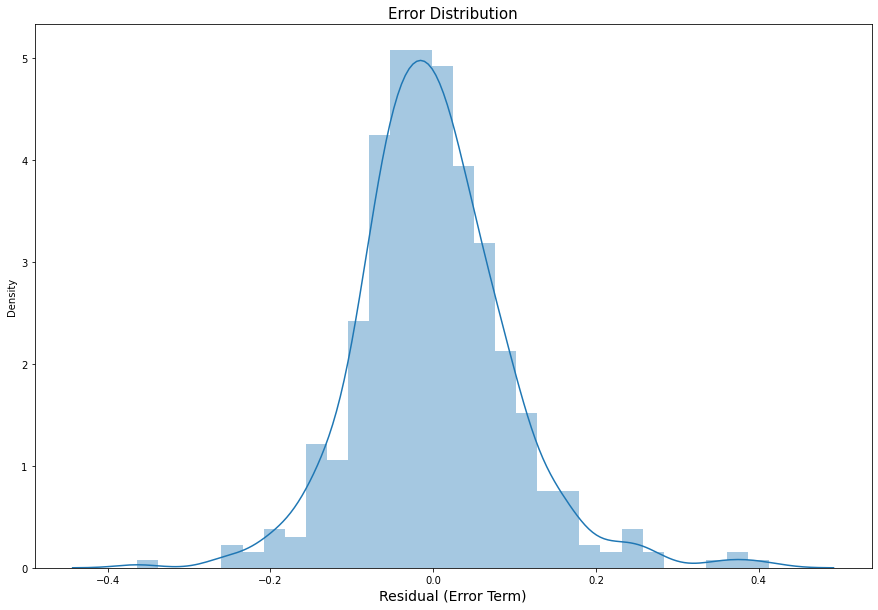

In [185]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
y_train_pred = Lr_Model6.predict(X_train_sm)
residual = y_train_pred - y_train
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 14})
plt.title('Error Distribution', fontdict={'fontsize': 15})
sns.distplot(residual,ax=ax)
plt.show()

Note:
From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0 in our model

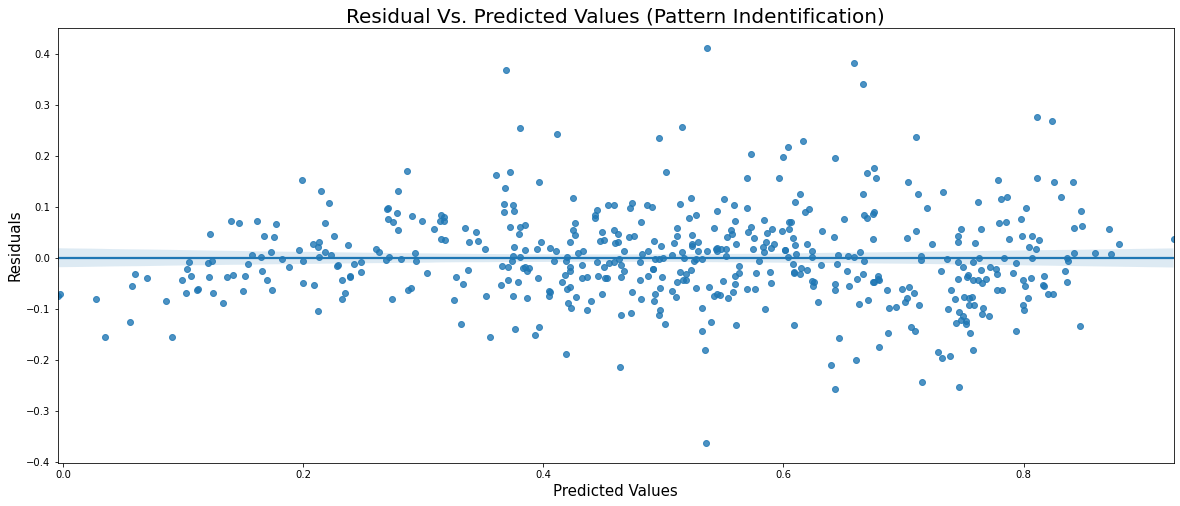

Pearson Value for Predicted Value Against Residual ==> 6.349087922075114e-16


In [186]:
### Validating homoscedasticity
from scipy.stats import pearsonr #import for calulating pearsonr
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train_pred, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

In [143]:
#Validating Independence of residuals
print("The Durbin-Watson value for Final Model lr 6 is",round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),2))

The Durbin-Watson value for Final Model lr 6 is 2.02


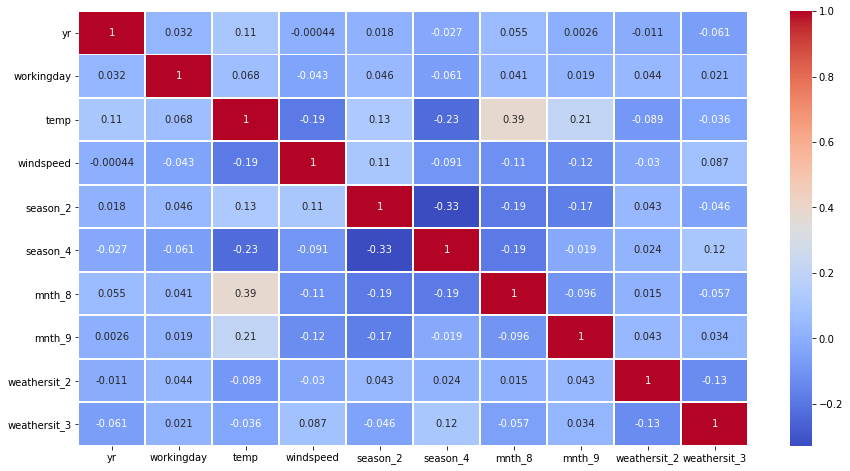

In [187]:
##Validating Absence of Multicolinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="coolwarm",linewidth =1)
plt.show()



In [188]:
#R Sqaure Observation for Train Data
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_train, y_train_pred)

0.8316215446152919

### Model on test set

In [222]:
numeric_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [223]:
df_test[numeric_vars]

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968
...,...,...,...,...,...
702,19.509153,23.45270,73.3750,11.666643,6606
127,21.661653,25.94665,63.1667,5.000712,4333
640,26.957500,29.95665,79.3750,4.458569,7572
72,13.333897,16.60000,49.6957,9.174042,2046


In [217]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
#Only transforming the test set and not fitting it
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars]) 
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [226]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
## Test Target Variable
y_test = df_test.pop('cnt')
##Fixing Test Feature(s) Variable
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [228]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [229]:
##Filtering Test Input
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_8        220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 19.7 KB


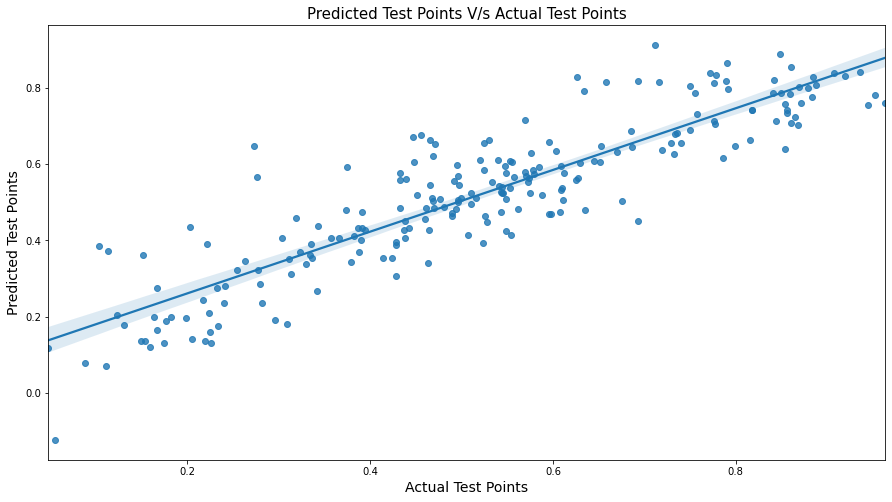

In [230]:
#predicting Test Data Using Developed Model
y_pred = Lr_Model6.predict(X_test_new)
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Test Points V/s Actual Test Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 14})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 14})
plt.show()

In [239]:
#### From the above graph, we see that there is almost no relation between Residual & Predicted Value. 
### Thus there is no specific patterm, this describes homoscedasticity

In [231]:
y_pred.head()

184    0.449877
535    0.913695
299    0.407019
221    0.596487
152    0.580667
dtype: float64

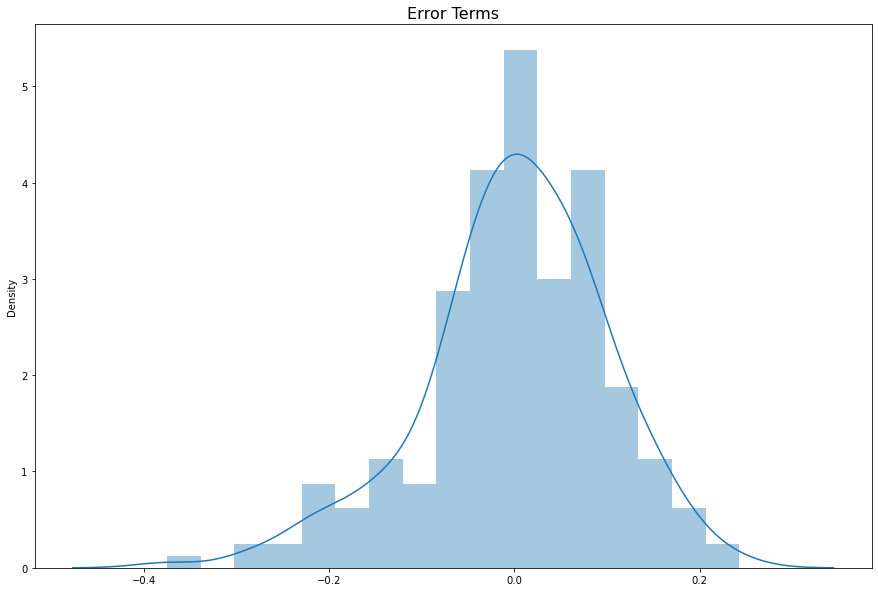

In [232]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

In [374]:
###The above distribution plot of error term shows the normal distribution with mean at Zero.

In [233]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [234]:
y_pred

184    0.449877
535    0.913695
299    0.407019
221    0.596487
152    0.580667
         ...   
702    0.731296
127    0.506421
640    0.802555
72     0.276255
653    0.723855
Length: 220, dtype: float64

In [235]:
##Generating R-Square
r2_score = r2_score(y_test, y_pred)
r2_score

0.7927249590182399

In [236]:
X_test_new.shape

(220, 11)

In [237]:
###Generating Adjusted R2
n=X_test_new.shape[0]
p=X_test_new.shape[1]
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7817632981970891

In [238]:
#Mean Square Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0099


In [240]:
Lr_Model6.params

const           0.111262
yr              0.232250
workingday      0.023135
temp            0.519176
windspeed      -0.148850
season_2        0.101969
season_4        0.137260
mnth_8          0.054916
mnth_9          0.113041
weathersit_2   -0.080691
weathersit_3   -0.280261
dtype: float64

### <font color =blue> Final Report on Test & Train
Final Comparision of R^2 and Adjsuted R^2.

Train R^2 : 0.8303 [Train values results are taken from Model-6]

Train Adjusted R^2 :0.838 [Train values results are taken from Model-6]

Test R^2 :0.7927

Test Adjusted R^2 :0.7817

This seems to be a good model that can very well 'Generalize' various datasets.

### Final conclusion
As per our final Model, the top 3 predictor variables that influences the bike booking are:

##### <font color =blue> temp, yr, season_2
A unit increase in temp(Temperature) variable increase the bike hire numbers by 0.519176 units.
A unit increase in yr(Year) variable increase the bike hire numbers by 0.232250 units.
A unit increase in season_2(summer) variable increase the bike hire numbers by 0.101969 units.
So it recommended to give maximum consideration to above features to achieve maximum bike rental demand
Next best variables to be considered:

##### <font color =blue> workingday  - A coefficient value of ‘0.0231’ indicated that a unit increase in workind day variable increases bike hire numbers by 0.023135 units.
##### <font color =blue> windspeed - A coefficient value of ‘-0.148850’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.149709 units.